# Retail Transaction and Promotion Response Feature Engineering
##### By: Portia Masibi

#### Using Retail Transaction Data from Kaggle to build  a wide range of features  that will be used as inputs to predict  the clients response to a promotion campaign 

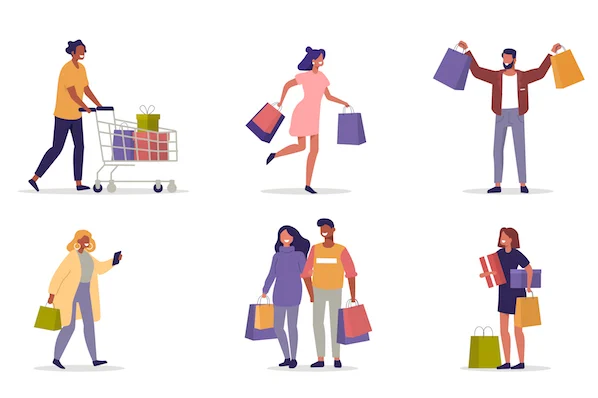

In [1]:
# First to import relevant libraries and modules that will be used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data 
transaction_data = pd.read_csv('Retail_Data_Transactions.csv')
print( 'There are',len(transaction_data), 'rows')
transaction_data


FileNotFoundError: [Errno 2] No such file or directory: 'Retail_Data_Transactions.csv'

In [4]:
print( 'Checking for missing values',transaction_data.isnull().sum())
# Checking the data types we are dealing with
transaction_data.info()

Checking for missing values customer_id    0
trans_date     0
tran_amount    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [5]:
# Getting statistical data from the transaction amount
transaction_data.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


In [6]:
# First changing the date column to standard time, making it easier to deal with time features
transaction_data["txn_date"] = pd.to_datetime(transaction_data["trans_date"])
transaction_data = transaction_data.drop(columns ="trans_date")
transaction_data

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


In [7]:
 # Min and Max of txn_date
min_date = min(transaction_data["txn_date"])
max_date = max(transaction_data["txn_date"])
print('The min of the transaction dates is:', min_date , '\n')
print('The max of the transaction dates is:', max_date)

The min of the transaction dates is: 2011-05-16 00:00:00 

The max of the transaction dates is: 2015-03-16 00:00:00


In [8]:
# Column for the last day of the month 
transaction_data["ME_DT"] = transaction_data["txn_date"] + pd.offsets.MonthEnd(0)
transaction_data

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30
...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30
124996,CS7232,38,2014-08-19,2014-08-31
124997,CS8731,42,2014-11-28,2014-11-30
124998,CS8133,13,2013-12-14,2013-12-31


In [9]:
# Column with year 
transaction_data["YEAR"] = pd.DatetimeIndex(transaction_data["txn_date"]).year
transaction_data

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


### 1. Features that Capture Annual Spending

#### Capturing the clients annual spending by using the rationale that the clients spend is not very frequent to capture in a monthly aggregation 

In [10]:
# Creating an annual aggregrations dataframe with its information

column_names = (['ann_txn_amt_sum','ann_txn_amt_ave','ann_txn_amt_std','ann_txn_amt_var','ann_txn_amt_sem','ann_txn_amt_max','ann_txn_amt_min','ann_txn_cnt'])
clnt_annual_aggregations = transaction_data.groupby(['customer_id', 'YEAR']).agg(['sum','mean','std','var','sem','max','min','count'])
clnt_annual_aggregations.columns = column_names
clnt_annual_aggregations


ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id YEAR                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1  
...                           ...          ...  
CS9000      2011               16            2  
            2012               37            4  
            2013               71            2  
            2014               16            4  
            2015               34            1  

[31140 rows x 8 columns]

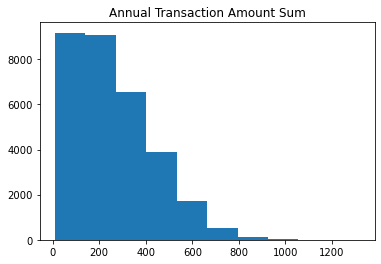

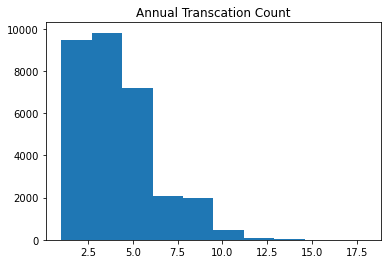

In [11]:
# Plotting histogram of the sum and count 

plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'])
plt.title('Annual Transaction Amount Sum')
plt.show()

plt.hist(clnt_annual_aggregations['ann_txn_cnt'])
plt.title('Annual Transcation Count')
plt.show()


In [12]:
# Pivoting the table 
clnt_annual_aggregations_pivot = clnt_annual_aggregations.unstack(1)
print('\n')
print('There are 40 columns as for every year, 2011-2015, the annual  sum, mean, std, var, sem, max, min, count is calculated, so 5 years and 8 statistical/descriptive calculation which give 40 columns ')
clnt_annual_aggregations_pivot 




There are 40 columns as for every year, 2011-2015, the annual  sum, mean, std, var, sem, max, min, count is calculated, so 5 years and 8 statistical/descriptive calculation which give 40 columns 


ann_txn_amt_sum                             ann_txn_amt_ave  \
YEAR                   2011   2012   2013   2014   2015            2011   
customer_id                                                               
CS1112                212.0  337.0  212.0  212.0   39.0       70.666667   
CS1113                244.0  374.0  426.0  226.0  220.0       81.333333   
CS1114                426.0  150.0  352.0  425.0   79.0       85.200000   
CS1115                261.0  473.0  557.0  313.0   55.0       87.000000   
CS1116                235.0  230.0   59.0  333.0    NaN       58.750000   
...                     ...    ...    ...    ...    ...             ...   
CS8996                 62.0  101.0   83.0  336.0    NaN       31.000000   
CS8997                 90.0  158.0  211.0   84.0    NaN       45.000000   
CS8998                128.0  272.0   94.0  130.0    NaN       64.000000   
CS8999                156.0  101.0   84.0   42.0    NaN       52.000000   
CS9000                 39.0  216.0  147.0   97.0   34.0       19.500000   

                                                         ... ann_txn_amt_min  \
YEAR              2012       2013       2014       2015  ...            2011   
customer_id                                              ...                   
CS1112       67.400000  70.666667  70.666667  39.000000  ...            56.0   
CS1113       74.800000  85.200000  56.500000  73.333333  ...            57.0   
CS1114       75.000000  70.400000  70.833333  79.000000  ...            76.0   
CS1115       67.571429  79.571429  78.250000  55.000000  ...            72.0   
CS1116       76.666667  59.000000  66.600000        NaN  ...            41.0   
...                ...        ...        ...        ...  ...             ...   
CS8996       33.666667  41.500000  56.000000        NaN  ...            24.0   
CS8997       39.500000  35.166667  42.000000        NaN  ...            43.0   
CS8998       54.400000  47.000000  32.500000        NaN  ...            59.0   
CS8999       25.250000  28.000000  21.000000        NaN  ...            31.0   
CS9000       54.000000  73.500000  24.250000  34.000000  ...            16.0   

                                    ann_txn_cnt                      
YEAR         2012  2013  2014  2015        2011 2012 2013 2014 2015  
customer_id                                                          
CS1112       52.0  36.0  59.0  39.0         3.0  5.0  3.0  3.0  1.0  
CS1113       51.0  65.0  36.0  44.0         3.0  5.0  5.0  4.0  3.0  
CS1114       53.0  43.0  37.0  79.0         5.0  2.0  5.0  6.0  1.0  
CS1115       41.0  66.0  50.0  55.0         3.0  7.0  7.0  4.0  1.0  
CS1116       45.0  59.0  40.0   NaN         4.0  3.0  1.0  5.0  NaN  
...           ...   ...   ...   ...         ...  ...  ...  ...  ...  
CS8996       29.0  33.0  30.0   NaN         2.0  3.0  2.0  6.0  NaN  
CS8997       33.0  21.0  39.0   NaN         2.0  4.0  6.0  2.0  NaN  
CS8998       29.0  19.0  13.0   NaN         2.0  5.0  2.0  4.0  NaN  
CS8999       19.0  19.0  18.0   NaN         3.0  4.0  3.0  2.0  NaN  
CS9000       37.0  71.0  16.0  34.0         2.0  4.0  2.0  4.0  1.0  

[6889 rows x 40 columns]

In [13]:
# Replacing NaN values 
print('\n')
print('Replacing NaN with zero as the frequency of customers buying may not be yearly, so the sum can be zero, which makes other variables 0 too \n')
print('For Example this can be seen in the year 2015,customer CS116, the sum is NaN,meaning they did not buy that year so mean, std, var, sem, max, min, count are also NaN. This can simply be replaced by 0.')
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.fillna(value = 0)
clnt_annual_aggregations_pivot




Replacing NaN with zero as the frequency of customers buying may not be yearly, so the sum can be zero, which makes other variables 0 too 

For Example this can be seen in the year 2015,customer CS116, the sum is NaN,meaning they did not buy that year so mean, std, var, sem, max, min, count are also NaN. This can simply be replaced by 0.


ann_txn_amt_sum                             ann_txn_amt_ave  \
YEAR                   2011   2012   2013   2014   2015            2011   
customer_id                                                               
CS1112                212.0  337.0  212.0  212.0   39.0       70.666667   
CS1113                244.0  374.0  426.0  226.0  220.0       81.333333   
CS1114                426.0  150.0  352.0  425.0   79.0       85.200000   
CS1115                261.0  473.0  557.0  313.0   55.0       87.000000   
CS1116                235.0  230.0   59.0  333.0    0.0       58.750000   
...                     ...    ...    ...    ...    ...             ...   
CS8996                 62.0  101.0   83.0  336.0    0.0       31.000000   
CS8997                 90.0  158.0  211.0   84.0    0.0       45.000000   
CS8998                128.0  272.0   94.0  130.0    0.0       64.000000   
CS8999                156.0  101.0   84.0   42.0    0.0       52.000000   
CS9000                 39.0  216.0  147.0   97.0   34.0       19.500000   

                                                         ... ann_txn_amt_min  \
YEAR              2012       2013       2014       2015  ...            2011   
customer_id                                              ...                   
CS1112       67.400000  70.666667  70.666667  39.000000  ...            56.0   
CS1113       74.800000  85.200000  56.500000  73.333333  ...            57.0   
CS1114       75.000000  70.400000  70.833333  79.000000  ...            76.0   
CS1115       67.571429  79.571429  78.250000  55.000000  ...            72.0   
CS1116       76.666667  59.000000  66.600000   0.000000  ...            41.0   
...                ...        ...        ...        ...  ...             ...   
CS8996       33.666667  41.500000  56.000000   0.000000  ...            24.0   
CS8997       39.500000  35.166667  42.000000   0.000000  ...            43.0   
CS8998       54.400000  47.000000  32.500000   0.000000  ...            59.0   
CS8999       25.250000  28.000000  21.000000   0.000000  ...            31.0   
CS9000       54.000000  73.500000  24.250000  34.000000  ...            16.0   

                                    ann_txn_cnt                      
YEAR         2012  2013  2014  2015        2011 2012 2013 2014 2015  
customer_id                                                          
CS1112       52.0  36.0  59.0  39.0         3.0  5.0  3.0  3.0  1.0  
CS1113       51.0  65.0  36.0  44.0         3.0  5.0  5.0  4.0  3.0  
CS1114       53.0  43.0  37.0  79.0         5.0  2.0  5.0  6.0  1.0  
CS1115       41.0  66.0  50.0  55.0         3.0  7.0  7.0  4.0  1.0  
CS1116       45.0  59.0  40.0   0.0         4.0  3.0  1.0  5.0  0.0  
...           ...   ...   ...   ...         ...  ...  ...  ...  ...  
CS8996       29.0  33.0  30.0   0.0         2.0  3.0  2.0  6.0  0.0  
CS8997       33.0  21.0  39.0   0.0         2.0  4.0  6.0  2.0  0.0  
CS8998       29.0  19.0  13.0   0.0         2.0  5.0  2.0  4.0  0.0  
CS8999       19.0  19.0  18.0   0.0         3.0  4.0  3.0  2.0  0.0  
CS9000       37.0  71.0  16.0  34.0         2.0  4.0  2.0  4.0  1.0  

[6889 rows x 40 columns]

In [14]:
# Number of levels and columns 

print('\n')
print('There are 2 levels.For every column in the 1st level, there are 5 columns in the 2nd level, so as we have 8 columns in the first level and 5 for each column in the second level this gives us 40 columns \n')
print('Number of levels:',clnt_annual_aggregations_pivot . columns . nlevels)
clnt_annual_aggregations_pivot . columns




There are 2 levels.For every column in the 1st level, there are 5 columns in the 2nd level, so as we have 8 columns in the first level and 5 for each column in the second level this gives us 40 columns 

Number of levels: 2


MultiIndex([('ann_txn_amt_sum', 2011),
            ('ann_txn_amt_sum', 2012),
            ('ann_txn_amt_sum', 2013),
            ('ann_txn_amt_sum', 2014),
            ('ann_txn_amt_sum', 2015),
            ('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_amt_var', 2011),
            ('ann_txn_amt_var', 2012),
            ('ann_txn_amt_var', 2013),
            ('ann_txn_amt_var', 2014),
            ('ann_txn_amt_var', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

In [15]:
#Saving clnt_annual_aggregations_pivot as an.xlsx file
level_0 = clnt_annual_aggregations_pivot . columns . get_level_values ( 0 ) .astype ( str)
level_1 = clnt_annual_aggregations_pivot . columns . get_level_values ( 1 ) .astype ( str)
clnt_annual_aggregations_pivot . columns = level_0 + '_' + level_1
clnt_annual_aggregations_pivot

,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,...,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,212.0,337.0,212.0,212.0,39.0,70.666667,67.400000,70.666667,70.666667,39.000000,...,56.0,52.0,36.0,59.0,39.0,3.0,5.0,3.0,3.0,1.0
CS1113,244.0,374.0,426.0,226.0,220.0,81.333333,74.800000,85.200000,56.500000,73.333333,...,57.0,51.0,65.0,36.0,44.0,3.0,5.0,5.0,4.0,3.0
CS1114,426.0,150.0,352.0,425.0,79.0,85.200000,75.000000,70.400000,70.833333,79.000000,...,76.0,53.0,43.0,37.0,79.0,5.0,2.0,5.0,6.0,1.0
CS1115,261.0,473.0,557.0,313.0,55.0,87.000000,67.571429,79.571429,78.250000,55.000000,...,72.0,41.0,66.0,50.0,55.0,3.0,7.0,7.0,4.0,1.0
CS1116,235.0,230.0,59.0,333.0,0.0,58.750000,76.666667,59.000000,66.600000,0.000000,...,41.0,45.0,59.0,40.0,0.0,4.0,3.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,62.0,101.0,83.0,336.0,0.0,31.000000,33.666667,41.500000,56.000000,0.000000,...,24.0,29.0,33.0,30.0,0.0,2.0,3.0,2.0,6.0,0.0
CS8997,90.0,158.0,211.0,84.0,0.0,45.000000,39.500000,35.166667,42.000000,0.000000,...,43.0,33.0,21.0,39.0,0.0,2.0,4.0,6.0,2.0,0.0
CS8998,128.0,272.0,94.0,130.0,0.0,64.000000,54.400000,47.000000,32.500000,0.000000,...,59.0,29.0,19.0,13.0,0.0,2.0,5.0,2.0,4.0,0.0


In [16]:
# Then save it, now we have annual features
clnt_annual_aggregations_pivot.to_excel('annual_features.xlsx')

### 2. Features that Capture Monthly Spending 

#### In this section we  compare Montlhy and Annual Sum and Count of transactions 

In [17]:
# Dataframe that captures monthly. sum and count of transactions per client
column_names = (['mth_txn_amt_sum','mth_txn_cnt'])
clnt_monthly_aggregations = transaction_data.groupby(['customer_id','ME_DT']).agg({'tran_amount':['sum','count']})
clnt_monthly_aggregations.columns = column_names
clnt_monthly_aggregations.head(15) 



mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
            2012-07-31               81            1
            2012-09-30               72            1
            2012-12-31               76            1
            2013-03-31              105            1
            2013-07-31               36            1
            2013-11-30               71            1
            2014-04-30               63            1
            2014-07-31               90            1
            2014-12-31               59            1
            2015-01-31               39            1

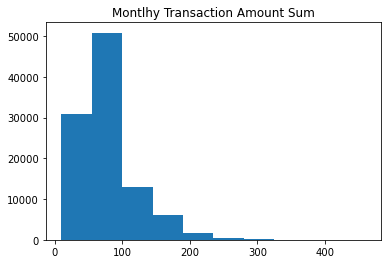

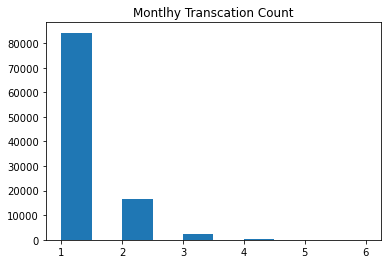

In [18]:
# Histogram of both columns
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
plt.title('Montlhy Transaction Amount Sum')
plt.show()

plt.hist(clnt_monthly_aggregations['mth_txn_cnt'])
plt.title('Montlhy Transcation Count')
plt.show()



The count for some months is zero indicating that the customers do not  buy on a monthly basis
The maximum monthly sum is ~ 50,000 while maximum monthly count is ~ 85,000
The maximum annual sum is ~ 6,500 while maximum annual count is ~ 8,800 
The monthly values are larger than yearly values as they capture more data in a short timespan

Most clients in this dataset shop a few times a year. For example, the client with ’customer id’ CS1112 shown above made purchases in 15 out of 47 months of data in the txn table. The information in this dataset is ”irregular”; some clients may have an entry for a month, whileothers do not have an entry (e.g. when they don’t shop for this particular month)


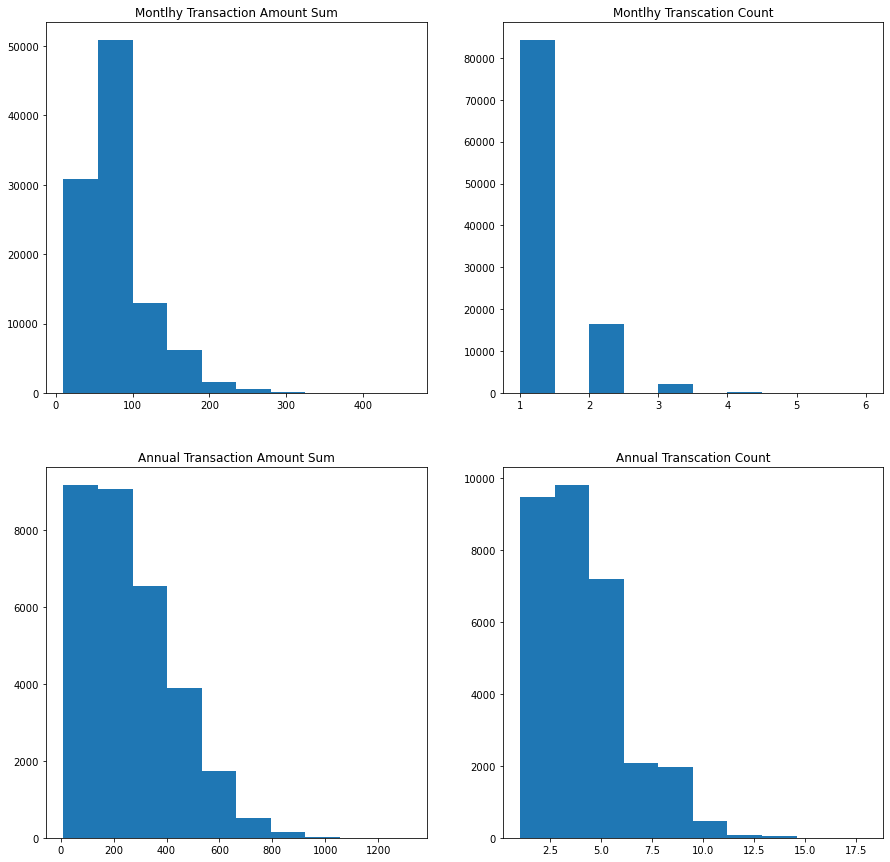

In [19]:
# Comparing yearly and monthly 

fig, axs = plt.subplots(2, 2, figsize=(15,15) )
axs[0, 0].hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
axs[0, 0].set_title('Montlhy Transaction Amount Sum')

axs[0, 1].hist(clnt_monthly_aggregations['mth_txn_cnt'])
axs[0, 1].set_title('Montlhy Transcation Count')

axs[1, 0].hist(clnt_annual_aggregations['ann_txn_amt_sum'])
axs[1, 0].set_title('Annual Transaction Amount Sum')

axs[1, 1].hist(clnt_annual_aggregations['ann_txn_cnt'])
axs[1, 1].set_title('Annual Transcation Count')


print('\nThe count for some months is zero indicating that the customers do not  buy on a monthly basis')
print('The maximum monthly sum is ~ 50,000 while maximum monthly count is ~ 85,000')
print('The maximum annual sum is ~ 6,500 while maximum annual count is ~ 8,800 ')
print('The monthly values are larger than yearly values as they capture more data in a short timespan')
print('\nMost clients in this dataset shop a few times a year. For example, the client with ’customer id’ CS1112 shown above made purchases in 15 out of 47 months of data in the txn table. The information in this dataset is ”irregular”; some clients may have an entry for a month, whileothers do not have an entry (e.g. when they don’t shop for this particular month)')


### Create the monthly rolling window features

#### This is to convert the irregular transaction data into the typical time series data; data captured at equal intervals. Feature engineering of time series data gives you the potential to build very powerful predictive models.

### First we create the base table for the rolling window features

#### In order to create the rolling window features we need to create a base table with all possible combinations of ’customer id’ and ’ME DT’. For example, customer CS1112 should have 47 entries, one for each month, in which 15 will have the value of transaction amount and the rest 32 will have zero value for transaction amount. This will essentially help to convert the ”irregular” clnt monthly aggregations table into a ”regular” one.

In [20]:
# Number of unique clients and unique month-end-dates
clnt_no = transaction_data["customer_id"]
me_dt = transaction_data['ME_DT']

print('Number of unique clients: ',clnt_no.nunique())
print('Number of unique month-end-dates: ',me_dt.nunique())


Number of unique clients:  6889
Number of unique month-end-dates:  47


In [21]:
# Using  itertools.product to generate all the possible combinations of ’customer id’ and’ME DT’. 
# Itertools is a Python module that iterates over data in a computationally efficient way

#from itertools import product
#base_table = product(clnt_no,me_dt)
#type(base_table)


In [22]:
# Converting the itertools product object into a pandas object 
#base_table_pd = pd.DataFrame.from_records(base_table, columns = ['CLNT_NO','ME_DT'])


In [23]:
# If the intertools take longer 

cln = transaction_data['customer_id'].unique().tolist()
cln.sort()
len(cln)

dt = transaction_data['ME_DT'].unique().tolist()
len(dt)

# creating an array that is 323,783 (47*6889) by 2 ( client,date)

bpt = []
for i in range(0,2000):
    for j in range(0,len(dt)):
        bpt.append([cln[i],dt[j]])
        
for i in range(2000,4000):
    for j in range(0,len(dt)):
        bpt.append([cln[i],dt[j]])
        
for i in range(2000,4000):
    for j in range(0,len(dt)):
        bpt.append([cln[i],dt[j]])

In [24]:
base_table_pd = pd.DataFrame(bpt, columns = ['CLNT_NO','ME_DT'])
# converting the 'ME_DT' column to datetime format
base_table_pd['ME_DT']= pd.to_datetime(base_table_pd['ME_DT'])

base_table_pd

,CLNT_NO,ME_DT
0,CS1112,2013-02-28
1,CS1112,2015-03-31
2,CS1112,2011-11-30
3,CS1112,2013-11-30
4,CS1112,2014-03-31
...,...,...
281995,CS5111,2011-08-31
281996,CS5111,2012-09-30
281997,CS5111,2014-09-30
281998,CS5111,2014-02-28


In [25]:
# Validating that the table created is correct
# First checking the number of unique clients and number of unique month end dates 

# Confirming base_table_pd details 

print('Rows of the Base Table are:', len(base_table_pd))
print('Unique clients:', base_table_pd['CLNT_NO'].nunique())
print('Unique month ends:',base_table_pd['ME_DT'].nunique())


Rows of the Base Table are: 282000
Unique clients: 4000
Unique month ends: 47


In [26]:
# Then checking filtering a client to see if the min and max dates fall between 2011-05-16 00:00:00  and 2015-03-16 00:00:00

contain_values= base_table_pd[base_table_pd['CLNT_NO'].str.contains('CS1112')]   
CS1112 = pd.DataFrame(contain_values)

min_date_CS1112 = min(CS1112["ME_DT"])
max_date_CS1112 = max(CS1112["ME_DT"])

print('The min of the transaction dates for customer CS1112 is:', min_date_CS1112)
print('The max of the transaction dates for customer CS1112 is:', max_date_CS1112)
print('So the min and max month dates fall within the range \n')

print('Client CS1112 has',len(CS1112),'rows')
CS1112


The min of the transaction dates for customer CS1112 is: 2011-05-31 00:00:00
The max of the transaction dates for customer CS1112 is: 2015-03-31 00:00:00
So the min and max month dates fall within the range 

Client CS1112 has 47 rows


,CLNT_NO,ME_DT
0,CS1112,2013-02-28
1,CS1112,2015-03-31
2,CS1112,2011-11-30
3,CS1112,2013-11-30
4,CS1112,2014-03-31
5,CS1112,2012-02-29
6,CS1112,2015-01-31
7,CS1112,2013-01-31
8,CS1112,2013-08-31
9,CS1112,2013-07-31


#### Now that we have the base table we can create the monthly rolling window features

In [27]:
# Left-joining the base table pd with the clnt monthly aggregations table from section on 
# [CLNT NO, ME DT] to create the table base clnt mth

clnt_monthly_aggregations1 = clnt_monthly_aggregations.reset_index(level='ME_DT')
clnt_monthly_aggregations2 = clnt_monthly_aggregations1.reset_index(level='customer_id')
clnt_monthly_aggregations2  = clnt_monthly_aggregations2.rename(columns={'customer_id': 'CLNT_NO'})
clnt_monthly_aggregations2 


,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2011-06-30,56,1
1,CS1112,2011-08-31,96,1
2,CS1112,2011-10-31,60,1
3,CS1112,2012-04-30,56,1
4,CS1112,2012-06-30,52,1
...,...,...,...,...
103229,CS9000,2014-01-31,16,1
103230,CS9000,2014-05-31,20,1
103231,CS9000,2014-07-31,26,1
103232,CS9000,2014-08-31,35,1


In [28]:
# Joining base_table_pd with clnt_monthly_aggregations
base_clnt_mth = pd.merge(base_table_pd,clnt_monthly_aggregations2,on = ['CLNT_NO','ME_DT'],how='left')
base_clnt_mth


,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2013-02-28,NaN,NaN
1,CS1112,2015-03-31,NaN,NaN
2,CS1112,2011-11-30,NaN,NaN
3,CS1112,2013-11-30,71.0,1.0
4,CS1112,2014-03-31,NaN,NaN
...,...,...,...,...
281995,CS5111,2011-08-31,81.0,1.0
281996,CS5111,2012-09-30,NaN,NaN
281997,CS5111,2014-09-30,NaN,NaN
281998,CS5111,2014-02-28,NaN,NaN


In [29]:
print('Some rows on the merged dataframe have NaN as for those dates/months there are no transactions so the NaN will be replaced by 0 in both the sum and count values \n')
print('The dataframe has  rows as expected as it was merged to the base_table_pd with 323,783 rows \n')
print('The base_clnt_mth has 323,783 rows and the clnt_monthly_aggregation has 103,234, the difference is beacuse for the clnt_monthly_aggregation it only captures months of transactions while the base_clnt_month captures all months, with or without transactions')
base_clnt_mth = base_clnt_mth.fillna(0)
base_clnt_mth

Some rows on the merged dataframe have NaN as for those dates/months there are no transactions so the NaN will be replaced by 0 in both the sum and count values 

The dataframe has  rows as expected as it was merged to the base_table_pd with 323,783 rows 

The base_clnt_mth has 323,783 rows and the clnt_monthly_aggregation has 103,234, the difference is beacuse for the clnt_monthly_aggregation it only captures months of transactions while the base_clnt_month captures all months, with or without transactions


,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2013-02-28,0.0,0.0
1,CS1112,2015-03-31,0.0,0.0
2,CS1112,2011-11-30,0.0,0.0
3,CS1112,2013-11-30,71.0,1.0
4,CS1112,2014-03-31,0.0,0.0
...,...,...,...,...
281995,CS5111,2011-08-31,81.0,1.0
281996,CS5111,2012-09-30,0.0,0.0
281997,CS5111,2014-09-30,0.0,0.0
281998,CS5111,2014-02-28,0.0,0.0


In [30]:
# Sorting client names and dates in ascending order, necessary for creating the order for rolling windows
base_clnt_mth = base_clnt_mth.sort_values(by = ['CLNT_NO','ME_DT'])
base_clnt_mth.head(50)

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
37,CS1112,2011-05-31,0.0,0.0
31,CS1112,2011-06-30,56.0,1.0
17,CS1112,2011-07-31,0.0,0.0
42,CS1112,2011-08-31,96.0,1.0
33,CS1112,2011-09-30,0.0,0.0
21,CS1112,2011-10-31,60.0,1.0
2,CS1112,2011-11-30,0.0,0.0
22,CS1112,2011-12-31,0.0,0.0
19,CS1112,2012-01-31,0.0,0.0
5,CS1112,2012-02-29,0.0,0.0


In [31]:
# Using the rolling window to calculate statistical properties

# window_size = 3
indv_client = base_clnt_mth.groupby('CLNT_NO')
rolling_features_3M = indv_client.rolling(window = 3).agg(['sum','mean','max'])
rolling_features_3M


mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  37                 NaN        NaN   NaN         NaN       NaN  NaN
        31                 NaN        NaN   NaN         NaN       NaN  NaN
        17                56.0  18.666667  56.0         1.0  0.333333  1.0
        42               152.0  50.666667  96.0         2.0  0.666667  1.0
        33                96.0  32.000000  96.0         1.0  0.333333  1.0
...                        ...        ...   ...         ...       ...  ...
CS5111  281959           160.0  53.333333  59.0         3.0  1.000000  1.0
        187976           118.0  39.333333  59.0         2.0  0.666667  1.0
        281976            59.0  19.666667  59.0         1.0  0.333333  1.0
        187954             0.0   0.000000   0.0         0.0  0.000000  0.0
        281954             0.0   0.000000   0.0         0.0  0.000000  0.0

[282000 rows x 6 columns]

In [32]:
#window_size = 6
rolling_features_6M = indv_client.rolling(window = 6).agg(['sum','mean','max'])
rolling_features_6M.head(10)


mth_txn_amt_sum                  mth_txn_cnt               
                       sum       mean   max         sum      mean  max
CLNT_NO                                                               
CS1112  37             NaN        NaN   NaN         NaN       NaN  NaN
        31             NaN        NaN   NaN         NaN       NaN  NaN
        17             NaN        NaN   NaN         NaN       NaN  NaN
        42             NaN        NaN   NaN         NaN       NaN  NaN
        33             NaN        NaN   NaN         NaN       NaN  NaN
        21           212.0  35.333333  96.0         3.0  0.500000  1.0
        2            212.0  35.333333  96.0         3.0  0.500000  1.0
        22           156.0  26.000000  96.0         2.0  0.333333  1.0
        19           156.0  26.000000  96.0         2.0  0.333333  1.0
        5             60.0  10.000000  60.0         1.0  0.166667  1.0

In [33]:
#window_size = 12
rolling_features_12M = indv_client.rolling(window = 12).agg(['sum','mean','max'])
rolling_features_12M.head(15)


mth_txn_amt_sum                  mth_txn_cnt               
                       sum       mean   max         sum      mean  max
CLNT_NO                                                               
CS1112  37             NaN        NaN   NaN         NaN       NaN  NaN
        31             NaN        NaN   NaN         NaN       NaN  NaN
        17             NaN        NaN   NaN         NaN       NaN  NaN
        42             NaN        NaN   NaN         NaN       NaN  NaN
        33             NaN        NaN   NaN         NaN       NaN  NaN
        21             NaN        NaN   NaN         NaN       NaN  NaN
        2              NaN        NaN   NaN         NaN       NaN  NaN
        22             NaN        NaN   NaN         NaN       NaN  NaN
        19             NaN        NaN   NaN         NaN       NaN  NaN
        5              NaN        NaN   NaN         NaN       NaN  NaN
        18             NaN        NaN   NaN         NaN       NaN  NaN
        35           268.0  22.333333  96.0         4.0  0.333333  1.0
        34           268.0  22.333333  96.0         4.0  0.333333  1.0
        46           264.0  22.000000  96.0         4.0  0.333333  1.0
        38           345.0  28.750000  96.0         5.0  0.416667  1.0


##### We get NaN values  because when using rolling window, where the window size is n, the rolling looks for n-1 rows of data to aggregate, when the condition is not met, it will return NaN for the window. 


In [34]:
# Renaming columns and changing it to 1 level rom the 2 multi-index dataframe, makes it easier to save in excel

columns3M = ['amt_sum_3M','amt_mean_3M','amt_max_3M','txn_cnt_sum_3M','txn_cnt_mean_3M','txn_cnt_max_3M']
rolling_features_3M.columns = columns3M

columns6M = ['amt_sum_6M','amt_mean_6M','amt_max_6M','txn_cnt_sum_6M','txn_cnt_mean_6M','txn_cnt_max_6M']
rolling_features_6M.columns = columns6M

columns12M = ['amt_sum_12M','amt_mean_12M','amt_max12M','txn_cnt_sum_12M','txn_cnt_mean_12M','txn_cnt_max_12M']
rolling_features_12M.columns = columns12M
rolling_features_12M

amt_sum_12M  amt_mean_12M  amt_max12M  txn_cnt_sum_12M  \
CLNT_NO                                                                  
CS1112  37              NaN           NaN         NaN              NaN   
        31              NaN           NaN         NaN              NaN   
        17              NaN           NaN         NaN              NaN   
        42              NaN           NaN         NaN              NaN   
        33              NaN           NaN         NaN              NaN   
...                     ...           ...         ...              ...   
CS5111  281959        632.0     52.666667        75.0             10.0   
        187976        563.0     46.916667        75.0              9.0   
        281976        494.0     41.166667        75.0              8.0   
        187954        494.0     41.166667        75.0              8.0   
        281954        494.0     41.166667        75.0              8.0   

                txn_cnt_mean_12M  txn_cnt_max_12M  
CLNT_NO                                            
CS1112  37                   NaN              NaN  
        31                   NaN              NaN  
        17                   NaN              NaN  
        42                   NaN              NaN  
        33                   NaN              NaN  
...                          ...              ...  
CS5111  281959          0.833333              1.0  
        187976          0.750000              1.0  
        281976          0.666667              1.0  
        187954          0.666667              1.0  
        281954          0.666667              1.0  

[282000 rows x 6 columns]

In [35]:
# Merging tables  with the base_clnt_mth
# first dropping index level:0 
rolling_features_3M = rolling_features_3M.droplevel(0)
rolling_features_6M = rolling_features_6M.droplevel(0)
rolling_features_12M = rolling_features_12M.droplevel(0)


In [36]:
all_rolling_features = pd.merge(base_clnt_mth,rolling_features_3M,left_index=True, right_index=True)
all_rolling_features = pd.merge(all_rolling_features,rolling_features_6M,left_index=True, right_index=True)
all_rolling_features = pd.merge(all_rolling_features,rolling_features_12M,left_index=True, right_index=True)
all_rolling_features

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
37,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281959,CS5111,2015-01-31,59.0,1.0,160.0,53.333333,59.0,3.0,1.000000,1.0,...,75.0,6.0,1.000000,1.0,632.0,52.666667,75.0,10.0,0.833333,1.0
187976,CS5111,2015-02-28,0.0,0.0,118.0,39.333333,59.0,2.0,0.666667,1.0,...,75.0,5.0,0.833333,1.0,563.0,46.916667,75.0,9.0,0.750000,1.0
281976,CS5111,2015-02-28,0.0,0.0,59.0,19.666667,59.0,1.0,0.333333,1.0,...,59.0,4.0,0.666667,1.0,494.0,41.166667,75.0,8.0,0.666667,1.0
187954,CS5111,2015-03-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,59.0,3.0,0.500000,1.0,494.0,41.166667,75.0,8.0,0.666667,1.0


In [37]:
# Saving it as an xlsx file 
all_rolling_features.to_excel('mth_rolling_features.xlsx')

## 3. Date Related Features : Date of the Week 
#### Date-related features that capture information about the day of the week the transactions were performed

In [38]:
# The DatetimeIndex object allows extraction of many components of a DateTime object
# Here, we want to extract the day of the week from column ’txn date’ of the txn table (with Monday=0, Sunday=6)

day_of_the_week = transaction_data['txn_date'].dt.dayofweek
transaction_data['day_of_the_week'] = day_of_the_week 

day_name = transaction_data['txn_date'].dt.day_name()
transaction_data['day_name'] = day_name

transaction_data


,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday



From the figure below, thr transcations per day are approximately evenly distributed


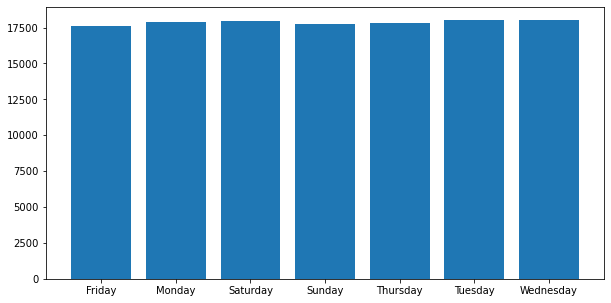

In [39]:
# Bar plot of count of transactions per day of the week 

x = transaction_data.groupby('day_name').count()
fig = plt.figure(figsize=(10,5))
plt.bar(x.index,x['day_of_the_week'])

print('\nFrom the figure below, thr transcations per day are approximately evenly distributed')


In [40]:
# 1.6.3 Capturing the count of transactions per client,year and day of the week

clnt_daily_aggregations = transaction_data.groupby(['customer_id','YEAR','day_name']).count()
clnt_daily_aggregations = clnt_daily_aggregations.unstack(1)
clnt_daily_aggregations = clnt_daily_aggregations.unstack(1)
clnt_daily_aggregations = clnt_daily_aggregations['tran_amount']
clnt_daily_aggregations = clnt_daily_aggregations.fillna(0)
clnt_daily_aggregations


YEAR          2011                                                     2012  \
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112         1.0    0.0      0.0    1.0      0.0     0.0       1.0    0.0   
CS1113         1.0    1.0      0.0    1.0      0.0     0.0       0.0    2.0   
CS1114         0.0    1.0      0.0    1.0      1.0     0.0       2.0    0.0   
CS1115         0.0    0.0      1.0    1.0      0.0     0.0       1.0    1.0   
CS1116         1.0    1.0      0.0    0.0      1.0     1.0       0.0    1.0   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996         0.0    1.0      0.0    0.0      0.0     1.0       0.0    0.0   
CS8997         0.0    0.0      0.0    0.0      1.0     0.0       1.0    1.0   
CS8998         0.0    0.0      0.0    0.0      0.0     1.0       1.0    2.0   
CS8999         0.0    1.0      1.0    0.0      0.0     1.0       0.0    1.0   
CS9000         0.0    0.0      0.0    2.0      0.0     0.0       0.0    1.0   

YEAR                         ...     2014                     2015         \
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112         0.0      1.0  ...      1.0     1.0       1.0    0.0    0.0   
CS1113         1.0      0.0  ...      0.0     3.0       0.0    0.0    2.0   
CS1114         0.0      1.0  ...      0.0     1.0       1.0    0.0    0.0   
CS1115         1.0      0.0  ...      2.0     0.0       2.0    0.0    0.0   
CS1116         0.0      0.0  ...      0.0     0.0       0.0    0.0    0.0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996         0.0      3.0  ...      1.0     1.0       2.0    0.0    0.0   
CS8997         2.0      0.0  ...      0.0     0.0       0.0    0.0    0.0   
CS8998         0.0      0.0  ...      0.0     1.0       1.0    0.0    0.0   
CS8999         0.0      2.0  ...      0.0     0.0       2.0    0.0    0.0   
CS9000         0.0      1.0  ...      1.0     1.0       0.0    0.0    0.0   

YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112           0.0    0.0      0.0     0.0       1.0  
CS1113           0.0    0.0      0.0     0.0       1.0  
CS1114           0.0    0.0      1.0     0.0       0.0  
CS1115           0.0    0.0      1.0     0.0       0.0  
CS1116           0.0    0.0      0.0     0.0       0.0  
...              ...    ...      ...     ...       ...  
CS8996           0.0    0.0      0.0     0.0       0.0  
CS8997           0.0    0.0      0.0     0.0       0.0  
CS8998           0.0    0.0      0.0     0.0       0.0  
CS8999           0.0    0.0      0.0     0.0       0.0  
CS9000           1.0    0.0      0.0     0.0       0.0  

[6889 rows x 35 columns]

In [41]:
# Dropping a level from a 3 level multi-level dataframe and remaning columns 
clnt_daily_aggregations = clnt_daily_aggregations.droplevel(0,axis = 1)
clnt_daily_aggregations


day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Friday,Monday,Saturday,...,Thursday,Tuesday,Wednesday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CS1113,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
CS1114,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1115,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1116,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8997,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8998,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Adding column names 

columns_daily =['cnt_2011_Friday','cnt_2011_Monday','cnt_2011_Saturday','cnt_2011_Sunday','cnt_2011_Thursday','cnt_2011_Tuesday','cnt_2011_Wednesday',
                'cnt_2012_Friday','cnt_2012_Monday','cnt_2012_Saturday','cnt_2012_Sunday','cnt_2012_Thursday','cnt_2012_Tuesday','cnt_2012_Wednesday',
                'cnt_2013_Friday','cnt_2013_Monday','cnt_2013_Saturday','cnt_2013_Sunday','cnt_2013_Thursday','cnt_2013_Tuesday','cnt_2013_Wednesday',
                'cnt_2014_Friday','cnt_2014_Monday','cnt_2014_Saturday','cnt_2014_Sunday','cnt_2014_Thursday','cnt_2014_Tuesday','cnt_2014_Wednesday',
                'cnt_2015_Friday','cnt_2015_Monday','cnt_2015_Saturday','cnt_2015_Sunday','cnt_2015_Thursday','cnt_2015_Tuesday','cnt_2015_Wednesday']


clnt_daily_aggregations.columns = columns_daily


In [43]:
#Confirming that output has the same number of rows as the annual features
print('clnt_annual_aggregations_pivot length:',len(clnt_annual_aggregations_pivot))
print('clnt_daily_aggregations length:', len(clnt_daily_aggregations))
# Therefore same number of rows 

clnt_annual_aggregations_pivot length: 6889
clnt_daily_aggregations length: 6889


In [44]:
# saving as excel file with 35 features/ columns 
clnt_daily_aggregations.to_excel('annual_day_of_week_counts_pivot.xlsx')

In [45]:
# Creating Features that capture the count of transactions per client,month-end-date and day of the week 

clnt_daily_month_aggregations = transaction_data.groupby(['customer_id','ME_DT','day_name']).count()
clnt_daily_month_aggregations = clnt_daily_month_aggregations.unstack(2)
clnt_daily_month_aggregations = clnt_daily_month_aggregations['tran_amount']
clnt_daily_month_aggregations = clnt_daily_month_aggregations.fillna(0)
clnt_daily_month_aggregations

columns_daily_month = ['cnt_Friday','cnt_Monday','cnt_Saturday','cnt_Sunday','cnt_Thursday','cnt_Tuesday','cnt_Wednesday']

clnt_daily_month_aggregations.columns = columns_daily_month
clnt_daily_month_aggregations


cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30         0.0         0.0           0.0         0.0   
            2011-08-31         1.0         0.0           0.0         0.0   
            2011-10-31         0.0         0.0           0.0         1.0   
            2012-04-30         0.0         0.0           0.0         1.0   
            2012-06-30         0.0         0.0           0.0         1.0   
...                            ...         ...           ...         ...   
CS9000      2014-01-31         0.0         0.0           0.0         1.0   
            2014-05-31         0.0         0.0           0.0         0.0   
            2014-07-31         0.0         0.0           0.0         0.0   
            2014-08-31         0.0         0.0           0.0         1.0   
            2015-02-28         0.0         0.0           1.0         0.0   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30           0.0          0.0            1.0  
            2011-08-31           0.0          0.0            0.0  
            2011-10-31           0.0          0.0            0.0  
            2012-04-30           0.0          0.0            0.0  
            2012-06-30           0.0          0.0            0.0  
...                              ...          ...            ...  
CS9000      2014-01-31           0.0          0.0            0.0  
            2014-05-31           1.0          0.0            0.0  
            2014-07-31           0.0          1.0            0.0  
            2014-08-31           0.0          0.0            0.0  
            2015-02-28           0.0          0.0            0.0  

[103234 rows x 7 columns]

In [46]:
# Joining with base_table 
clnt_daily_month_aggregations1 = clnt_daily_month_aggregations.reset_index(level='ME_DT')
clnt_daily_month_aggregations2 = clnt_daily_month_aggregations1.reset_index(level='customer_id')
clnt_daily_month_aggregations2  = clnt_daily_month_aggregations2.rename(columns={'customer_id': 'CLNT_NO'})
clnt_daily_month_aggregations2

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CS1112,2011-10-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,CS1112,2012-04-30,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,CS1112,2012-06-30,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
103229,CS9000,2014-01-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0
103230,CS9000,2014-05-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0
103231,CS9000,2014-07-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0
103232,CS9000,2014-08-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
monthly_day_counts = pd.merge(base_table_pd,clnt_daily_month_aggregations2,on = ['CLNT_NO','ME_DT'],how='left')
monthly_day_counts = monthly_day_counts .fillna(0)
monthly_day_counts.to_excel('mth_day_counts.xlsx')


### 4. Date-related Features: Days Since Last Transaction

#### In this date-related features set,we capture the frequency of the transactions in terms of the days since the last transaction. This set of features applies only to the monthly features.

In [48]:

# Capturing last monthly purchase 
# The starting point is the txn table. Recall that most clients have a single purchase per month, but some clients 
# have multiple purchases in a month. Since we want to calculate the ”days since last transaction”, we want to capture
# the last transaction in a month for every client

last_monthly_purchase = transaction_data.groupby(['customer_id','ME_DT']).max()
last_monthly_purchase = last_monthly_purchase['txn_date']
last_monthly_purchase

customer_id  ME_DT     
CS1112       2011-06-30   2011-06-15
             2011-08-31   2011-08-19
             2011-10-31   2011-10-02
             2012-04-30   2012-04-08
             2012-06-30   2012-06-24
                             ...    
CS9000       2014-01-31   2014-01-12
             2014-05-31   2014-05-08
             2014-07-31   2014-07-08
             2014-08-31   2014-08-24
             2015-02-28   2015-02-28
Name: txn_date, Length: 103234, dtype: datetime64[ns]

In [49]:
#Joining base table pd with last monthly purchase
last_monthly_purchase1 = last_monthly_purchase.reset_index(level='ME_DT')
last_monthly_purchase2 = last_monthly_purchase1.reset_index(level='customer_id')
last_monthly_purchase2  = last_monthly_purchase2.rename(columns={'customer_id': 'CLNT_NO'})
last_monthly_purchase2 = last_monthly_purchase2.rename(columns={'txn_date': 'last_monthly_purchase'})


base_table_pd_sorted = base_table_pd.sort_values(by = ['CLNT_NO','ME_DT'])


last_monthly_purchase_base = pd.merge(base_table_pd_sorted,last_monthly_purchase2,on = ['CLNT_NO','ME_DT'],how='left')
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase
0,CS1112,2011-05-31,NaT
1,CS1112,2011-06-30,2011-06-15
2,CS1112,2011-07-31,NaT
3,CS1112,2011-08-31,2011-08-19
4,CS1112,2011-09-30,NaT
...,...,...,...
281995,CS5111,2015-01-31,2015-01-08
281996,CS5111,2015-02-28,NaT
281997,CS5111,2015-02-28,NaT
281998,CS5111,2015-03-31,NaT


In [50]:
# Filling NaT 
last_monthly_purchase_base = last_monthly_purchase_base.groupby('CLNT_NO').apply(lambda x: x.ffill())

last_monthly_purchase_base.loc[92:98]


,CLNT_NO,ME_DT,last_monthly_purchase
92,CS1113,2015-02-28,2015-02-09
93,CS1113,2015-03-31,2015-02-09
94,CS1114,2011-05-31,NaT
95,CS1114,2011-06-30,NaT
96,CS1114,2011-07-31,2011-07-14
97,CS1114,2011-08-31,2011-08-24
98,CS1114,2011-09-30,2011-09-19


In [51]:

# Computing days since last transaction
# Subtracting the two date columns to calculate the column ’days since last txn’ 
days_since_last_txn = last_monthly_purchase_base['ME_DT'] - last_monthly_purchase_base['last_monthly_purchase']

days_since_last_txn = days_since_last_txn.dt.days

days_since_last_txn 

last_monthly_purchase_base['days_since_last_txn'] = days_since_last_txn 

last_monthly_purchase_base.head(60)



,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
0,CS1112,2011-05-31,NaT,NaN
1,CS1112,2011-06-30,2011-06-15,15.0
2,CS1112,2011-07-31,2011-06-15,46.0
3,CS1112,2011-08-31,2011-08-19,12.0
4,CS1112,2011-09-30,2011-08-19,42.0
5,CS1112,2011-10-31,2011-10-02,29.0
6,CS1112,2011-11-30,2011-10-02,59.0
7,CS1112,2011-12-31,2011-10-02,90.0
8,CS1112,2012-01-31,2011-10-02,121.0
9,CS1112,2012-02-29,2011-10-02,150.0


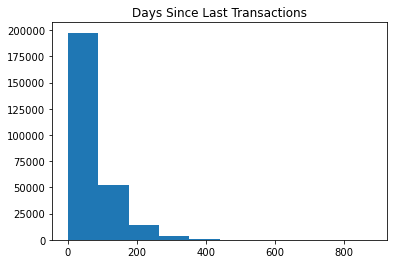

In [52]:
# Histogran for days_since_last_txn
plt.hist(last_monthly_purchase_base['days_since_last_txn'], bins = 10)
plt.title('Days Since Last Transactions')
plt.show()

In [53]:
print('The days with the common density is 100 so this is used to fill in number of days since last transaction values that give NaN')
last_monthly_purchase_base['days_since_last_txn'] = last_monthly_purchase_base['days_since_last_txn'].fillna(100)
last_monthly_purchase_base


The days with the common density is 100 so this is used to fill in number of days since last transaction values that give NaN


,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
0,CS1112,2011-05-31,NaT,100.0
1,CS1112,2011-06-30,2011-06-15,15.0
2,CS1112,2011-07-31,2011-06-15,46.0
3,CS1112,2011-08-31,2011-08-19,12.0
4,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
281995,CS5111,2015-01-31,2015-01-08,23.0
281996,CS5111,2015-02-28,2015-01-08,51.0
281997,CS5111,2015-02-28,2015-01-08,51.0
281998,CS5111,2015-03-31,2015-01-08,82.0


In [54]:
# Saving to excel
days_since_last_txn_excel = last_monthly_purchase_base.drop(['last_monthly_purchase'], axis = 1)
days_since_last_txn_excel.to_excel('days_since_last_txn.xlsx')

### RECAP : We created new features to use in our models, which are 
#### 1. Features that capture Annual Spending
#### 2. Features that Capture Monthly Spending 
#### 3. Date Related Features : Date of the Week Transaction was Performed 
#### 4. Date-related Features: Days Since Last Transaction